# 一、创建爬虫

### 1初见网络爬虫

In [13]:
#导入需要用到的包
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
from bs4 import BeautifulSoup    
import re
from urllib.parse import quote,urlparse

import random
import datetime
import time

import smtplib
from email.mime.text import MIMEText

In [19]:
try:
    html=urlopen('http://pythonscraping.com/pages/page1.html')
except HTTPError as e:
    print(e)
else:
    if html is None:
        print('URL is not found')

In [26]:
bsObj=BeautifulSoup(html.read())
try:
    badContent=bsObj.h1
except AttributeError as e:
    print('Tag was not found')
else:
    if badContent ==None:
        print('Tag was not found')
    else:
        print(badContent)

Tag was not found


### 2复杂HTML解析

In [ ]:
html=urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bsObj=BeautifulSoup(html)
# print(bsObj.h1)
# namelist=bsObj.findAll("span",{"class":"green"})
# namelist=bsObj.findAll(text='the prince')
# namelist=bsObj.findAll(['h1','h2','h3'])
# namelist=bsObj.findAll("span",{"class":{"green","red"}})
# namelist=bsObj.findAll(id='text')
namelist=bsObj.findAll(class_='green')
for name in namelist:
    print(name,end='')


In [4]:
html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)
# for child in bsObj.find('table',{'id':'giftList'}).children:
#     print(child)
# for sibling in bsObj.find('table',{'id':'giftList'}).tr.next_siblings:  #previous_siblings
#     print(sibling)
print(bsObj.find("img",{'src':'../img/gifts/img1.jpg'}).parent.previous_sibling.get_text())


$15.00



In [6]:

html=urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj=BeautifulSoup(html)
images=bsObj.findAll('img',{'src':re.compile("\.\.\/img\/gifts\/img.*\.jpg")})
for img in images:
    print(img.attrs['src']) #img['src']

# #获取有两个属性的标签
# bsObj.findAll(lambda tag:len(tag.attrs)==2)


../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


### 3开始采集

In [19]:
html=urlopen("https://baike.baidu.com/item/%E9%92%B1%E5%AD%A6%E6%A3%AE/26105")
bsObj=BeautifulSoup(html)
for link in bsObj.find('div',{'class':'star-info-block relations'}).findAll('a',href=re.compile("^(/item/)((?!:).)*$")):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/item/%E8%92%8B%E8%8B%B1/2511157
/item/%E9%92%B1%E6%B0%B8%E5%88%9A/6595519
/item/%E9%92%B1%E6%B0%B8%E7%9C%9F/2621098
/item/%E9%92%B1%E5%9D%87%E5%A4%AB/2586519
/item/%E8%92%8B%E7%99%BE%E9%87%8C/642539
/item/%E9%92%B1%E6%B0%B8%E4%BD%91/6770778
/item/%E9%92%B1%E6%B0%B8%E5%81%A5/29857
/item/%E7%8E%8B%E6%AF%93%E4%BA%91/9184928


In [34]:
# random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html=urlopen("https://baike.baidu.com"+articleUrl)
    bsObj=BeautifulSoup(html)
    return bsObj.findAll('a',href=re.compile("^(/item/)((?!:).)*/[0-9]*$"))

links=getLinks('/item/%E9%92%B1%E5%AD%A6%E6%A3%AE/26105')
while len(links)>0:
    newArticle=links[random.randint(0,len(links)-1)].attrs['href']
    print(newArticle)
    links=getLinks(newArticle)
    
    

/item/%E9%92%B1%E4%BB%A4%E5%B8%8C/444132
/item/%E5%8A%9B%E5%AD%A6/648839
/item/%E8%BE%B9%E7%BC%98%E5%AD%A6%E7%A7%91/2515678


In [ ]:
pages=set()
def getLinks(pageUrl):
    global pages
    html=urlopen("https://baike.baidu.com"+pageUrl)
    bsObj=BeautifulSoup(html)
    try:
        print(bsObj.title.get_text())
#         print(bsObj.find('meta',{'name':'description'}).attrs['content'])
        print(bsObj.find('meta',{'name':'description'}).attrs['content'])
    except AttributeError:
        print('页面缺少一些属性！不过不用担心！')
    for link in bsObj.findAll('a',href=re.compile("^(/item/)")):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                newPage=link.attrs['href']
                print('------------------------------------------------\n'+newPage)
                pages.add(newPage)
                getLinks(quote(newPage))
getLinks('')

百度百科_全球最大中文百科全书
百度百科是一部内容开放、自由的网络百科全书，旨在创造一个涵盖所有领域知识，服务所有互联网用户的中文知识性百科全书。在这里你可以参与词条编辑，分享贡献你的知识。
------------------------------------------------
/item/秒懂本尊答
秒懂本尊答_百度百科
秒懂本尊答是百度公司推出的权威人物短视频品牌。由明星大咖本尊出镜，直面网友最感兴趣的个人及行业话题，分享自身的观点和态度，解读现象背后的知识。让复杂的知识更简单的同时，带你了解人物的另一面。这些本尊亲自回应的权威小视频，将优先于其他第三方结果，通过百度搜索和本人词条，直达用户。这也使“秒懂本尊答”成为明星大咖们表达自我的重要窗口和发声渠道。百度APP搜索“秒懂本尊答”，一键get所有本尊答视频。...
------------------------------------------------
/item/秒懂大师说
秒懂大师说_百度百科
“秒懂大师说”是百度百科2017全新推出的秒懂百科子栏目，邀请中外各领域顶尖学者、智囊、权威人士分享解读当今社会最引人关注的热点趋势与话题，传授各领域最独到、权威的观点知识。...
------------------------------------------------
/item/秒懂看瓦特
秒懂看瓦特_百度百科
《秒懂看瓦特》是2018年百度百科推出的影视综解说的短视频栏目。《秒懂看瓦特》联合多位优秀的影评人，解说当下最热的电影、电视剧、综艺等娱乐内容，帮助更多人快速认识到“看what”？！...
------------------------------------------------
/item/秒懂五千年
秒懂五千年_百度百科
“秒懂五千年”是百度百科2018年全新推出的科普中国传统文化原创动画栏目。该栏目构思新颖风趣幽默，遵循中国历史的发展脉络引出了一个个生动有趣的传统文化故事，为青少年再现了中华民族五千年璀璨的文明。...
------------------------------------------------
/item/秒懂全视界
秒懂全视界_百度百科
“秒懂全视界”是百度百科与互动视界2017年12月联合推出的VR旅游短视频栏目。...
---------

In [15]:
#通过互联网采集
pages=set()
#获取页面所有内链的列表
def getInternalLinks(bsObj,includeUrl):
    includeUrl=urlparse(includeUrl).scheme+'://'+urlparse(includeUrl).netloc
    internalLinks=[]
    #找出所有以“/”开头的链接
    for link in bsObj.findAll('a',href=re.compile("^(/|.*"+includeUrl+")")):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                if (link.attrs['href'].startswith('/')):
                    internalLinks.append(includeUrl+link.attrs['href'])
                else:
                    internalLinks.append(link.attrs['href'])
    return internalLinks

#获取页面所有外链的列表
def getExternalLinks(bsObj,excludeUrl):
    externalLinks=[]
    #找出所有以“http”或“www”开头且不含当前URL的链接
    for link in bsObj.findAll('a',href=re.compile("^(http|www)((?!"+excludeUrl+").)*$")):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
    return externalLinks

def getRandomExternalLink(startingPage):
    html=urlopen(startingPage)
    bsObj=BeautifulSoup(html)
    externalLinks=getExternalLinks(bsObj,urlparse(startingPage).netloc)
    if len(externalLinks)==0:
        print('No external links,looking around the site for one')
        domain=urlparse(startingPage).scheme+'://'+urlparse(startingPage).netloc
        internalLinks=getInternalLinks(bsObj,domain)
        return getRandomExternalLink(internalLinks[random.randint(0,len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0,len(externalLinks)-1)]

def followExternalOnly(startingSite):
    externaLink=getRandomExternalLink(startingSite)
    print('Random external link is:'+externaLink)
    followExternalOnly(externaLink)

followExternalOnly("https://baike.baidu.com/")

Random external link is:http://help.baidu.com/newadd?prod_id=10&category=5
Random external link is:https://passport.baidu.com/export/app/index.html
Random external link is:https://itunes.apple.com/cn/app/bai-du-quan-zhong-xin-shou/id695439229
Random external link is:https://www.apple.com.cn/ipad/
Random external link is:https://locate.apple.com/cn/zh/
No external links,looking around the site for one


ValueError: empty range for randrange() (0, 0, 0)

In [17]:
#收集网站上发现的所有外链列表
allExtLinks=set()
allIntLinks=set()
#URL链接切片，为了获得域名

def splitAddress(adress):
    adressParts = adress.replace("http://", "").split("/")
    return adressParts

def getAllExternalLinks(siteUrl):
    html=urlopen(siteUrl)
    bsObj=BeautifulSoup(html)
    internalLinks=getInternalLinks(bsObj,splitAddress(siteUrl)[0])
    externalLinks=getExternalLinks(bsObj,splitAddress(siteUrl)[0])
    for link in externalLinks:
        if link not in allExtLinks:
            allExtLinks.add(link)
            print(link)
    for link in internalLinks:
        if link not in allIntLinks:
            print('即将获取链接的URL是：'+link)
            allIntLinks.add(link)
            getAllExternalLinks(link)
getAllExternalLinks("https://baike.baidu.com/")

http://www.baidu.com/
https://www.baidu.com/
http://news.baidu.com/
https://tieba.baidu.com/
https://zhidao.baidu.com/
http://music.baidu.com/
http://image.baidu.com/
http://v.baidu.com/
http://map.baidu.com/
https://wenku.baidu.com/
https://child.baidu.com/
https://baike.baidu.com/talent/home/index
https://baike.baidu.com/item/%E6%A4%8D%E5%8F%91#hotspotmining
https://baike.baidu.com/item/%E7%83%9F%E8%96%AF25#hotspotmining
https://baike.baidu.com/item/%E6%80%A7%E6%95%99%E8%82%B2/214274#hotspotmining
https://baike.baidu.com/item/%E5%90%B8%E7%AE%A1/1343710#hotspotmining
https://baike.baidu.com/item/%E9%99%A8%E7%9F%B3/181990#hotspotmining
https://baike.baidu.com/item/%E6%9C%9B%E6%B1%9F%E5%8D%97/8254489#hotspotmining
https://baike.baidu.com/item/%E8%B5%B5%E6%98%9A#hotspotmining
https://baike.baidu.com/item/%E8%A3%B8%E7%9C%BC3D#hotspotmining
https://baike.baidu.com/item/%E6%96%AD%E8%88%8D%E7%A6%BB/18860382#hotspotmining
http://service.weibo.com/share/share.php?url=http://www.iqiyi.com/w_19r

URLError: <urlopen error no host given>

### 4使用API

In [2]:
import json

In [16]:

response=urlopen('http://ip-api.com/json/202.196.17.229').read().decode('utf-8')
print(json.loads(response).get('country'))

China


### 5存储数据

In [5]:
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os

In [4]:
html=urlopen('http://www.pythonscraping.com')
bsObj=BeautifulSoup(html)
imageLocation=bsObj.find('a',{'id':'logo'}).find('img')['src']
print(imageLocation)
urlretrieve(imageLocation,'logo.jpg')

http://www.pythonscraping.com/sites/default/files/lrg_0.jpg


('logo.jpg', <http.client.HTTPMessage at 0x7161748>)

In [8]:
downloadDirectory='downloaded'
baseUrl='http://pythonscraping.com'
def getAbsoluteURL(baseUrl,source):
    if source.startswith('http://www.') or source.startswith('https://www.'):
        url='http://'+source[11:]
    elif source.startswith('http://') or source.startswith('https://'):
        url=source
    elif source.startswith('www.'):
        url='http://'+source[4:]
    else:
        url=baseUrl+'/'+source
    if baseUrl not in url:
        return None
    return url

def getDownloadPath(baseUrl,absoluteUrl,downloadDirectory):
    path=absoluteUrl.replace('www.','')
    path=path.replace(baseUrl,'')
    path=downloadDirectory+path
    directory=os.path.dirname(path)
    
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    return path

html=urlopen('http://www.pythonscraping.com')
bsObj=BeautifulSoup(html)
dowmloadList=bsObj.findAll(src=True)

for download in dowmloadList:
    fileUrl=getAbsoluteURL(baseUrl,download['src'])
    if fileUrl is not None:
        print(fileUrl)
        urlretrieve(fileUrl,getDownloadPath(baseUrl,fileUrl,downloadDirectory))
        

http://pythonscraping.com/misc/jquery.js?v=1.4.4


OSError: [Errno 22] Invalid argument: 'downloaded/misc/jquery.js?v=1.4.4'

In [14]:
import csv
csvfile=open('./test.csv','w+')
try:
    writer=csv.writer(csvfile)
    writer.writerow(('number','number plus 2','number times 2'))
    for i in range(10):
        writer.writerow((i,i+2,i*2))
finally:
    csvfile.close()

In [19]:
html=urlopen('https://baike.baidu.com/item/%E9%92%B1%E5%AD%A6%E6%A3%AE/26105')
bsObj=BeautifulSoup(html)
div=bsObj.findAll('div',{'class':'basic-info cmn-clearfix'})[0]
rows=div.findAll('dl')
csvfile=open('./editors.csv','wt',newline='',encoding='utf-8')
writer=csv.writer(csvfile)
try:
    for row in rows:
        csvrow=[]
        for cell in row.findAll(['dt','dd']):
            csvrow.append(cell.get_text())
        writer.writerow(csvrow)
finally:
    csvfile.close()

In [29]:
token='ufsbkqfgtyxwgiid'

msg=MIMEText('hello world!')
msg['Subject']='An email alert'
msg['From']='1533724418@qq.com'
msg['To']='1533724418@qq.com'

s=smtplib.SMTP_SSL('smtp.qq.com')
s.login('1533724418@qq.com',token)
s.send_message(msg)
s.quit()

(221, b'Bye.')

In [1]:
def sendMail(subject,body):
    token='ufsbkqfgtyxwgiid'
    msg=MIMEText(body)
    msg['Subject']=subject
    msg['From']='1533724418@qq.com'
    msg['To']='1533724418@qq.com;798446962@qq.com'
    s=smtplib.SMTP_SSL('smtp.qq.com')
    s.login('1533724418@qq.com',token)
    s.send_message(msg)
    s.quit()
    
# bsObj=BeautifulSoup(urlopen('http://time.tianqi.com/'))
# p=bsObj.find('p',{'id':'local'}).get_text()
# print(p)
sendMail('It is time!','According to http://itischristmas.com,it is christmas!')

NameError: name 'MIMEText' is not defined

### 6读取文档

In [3]:
textpage=urlopen('http://www.pythonscraping.com/pages/warandpeace/chapter1.txt')
print(textpage.read())

b'CHAPTER I\n\n"Well, Prince, so Genoa and Lucca are now just family estates of theBuonapartes. But I warn you, if you don\'t tell me that this means war,if you still try to defend the infamies and horrors perpetrated bythat Antichrist- I really believe he is Antichrist- I will havenothing more to do with you and you are no longer my friend, no longermy \'faithful slave,\' as you call yourself! But how do you do? I seeI have frightened you- sit down and tell me all the news."\n\nIt was in July, 1805, and the speaker was the well-known AnnaPavlovna Scherer, maid of honor and favorite of the Empress MaryaFedorovna. With these words she greeted Prince Vasili Kuragin, a manof high rank and importance, who was the first to arrive at herreception. Anna Pavlovna had had a cough for some days. She was, asshe said, suffering from la grippe; grippe being then a new word inSt. Petersburg, used only by the elite.\n\nAll her invitations without exception, written in French, anddelivered by a scarle

In [7]:
textpage=urlopen('http://www.pythonscraping.com/pages/warandpeace/chapter1-ru.txt')
print(str(textpage.read(),'utf-8'))

ЧАСТЬ ПЕРВАЯ

I

— Eh bien, mon prince. Gênes et Lucques ne sont plus que des apanages, des поместья, de la famille Buonaparte. Non, je vous préviens que si vous ne me dites pas que nous avons la guerre, si vous vous permettez encore de pallier toutes les infamies, toutes les atrocités de cet Antichrist (ma parole, j'y crois) — je ne vous connais plus, vous n'êtes plus mon ami, vous n'êtes plus мой верный раб, comme vous dites. Ну, здравствуйте, здравствуйте. Je vois que je vous fais peur, садитесь и рассказывайте.
Так говорила в июле 1805 года известная Анна Павловна Шерер, фрейлина и приближенная императрицы Марии Феодоровны, встречая важного и чиновного князя Василия, первого приехавшего на ее вечер. Анна Павловна кашляла несколько дней, у нее был грипп, как она говорила (грипп был тогда новое слово, употреблявшееся только редкими). В записочках, разосланных утром с красным лакеем, было написано без различия во всех:
«Si vous n'avez rien de mieux à faire, Monsieur le comte (или mon 

In [2]:
html=urlopen('http://en.wikipedia.org/wiki/Python_(programming_language)')
bsObj=BeautifulSoup(html)
content=bsObj.find('div',{'id','mw-content-text'}).get_text()
content=bytes(content,'utf-8')
content=content.decode('utf-8')

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [9]:
from io import StringIO
import csv
data=urlopen('http://pythonscraping.com/files/MontyPythonAlbums.csv').read().decode('ascii','ignore')
dataFile=StringIO(data)
csvReader=csv.reader(dataFile)

for row in csvReader:
    print(row)

# csv.DictReader(dataFile)


['Name', 'Year']
["Monty Python's Flying Circus", '1970']
['Another Monty Python Record', '1971']
["Monty Python's Previous Record", '1972']
['The Monty Python Matching Tie and Handkerchief', '1973']
['Monty Python Live at Drury Lane', '1974']
['An Album of the Soundtrack of the Trailer of the Film of Monty Python and the Holy Grail', '1975']
['Monty Python Live at City Center', '1977']
['The Monty Python Instant Record Collection', '1977']
["Monty Python's Life of Brian", '1979']
["Monty Python's Cotractual Obligation Album", '1980']
["Monty Python's The Meaning of Life", '1983']
['The Final Rip Off', '1987']
['Monty Python Sings', '1989']
['The Ultimate Monty Python Rip Off', '1994']
['Monty Python Sings Again', '2014']


In [10]:
from pdfminer.pdfinterp import PDFResourceManager,process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open

def readPDF(pdfFile):
    rsrcmgr=PDFResourceManager()
    retstr=StringIO()
    laparams=LAParams()
    device=TextConverter(rsrcmgr,retstr,laparams=laparams)
    
    process_pdf(rsrcmgr,device,pdfFile)
    device.close()
    content=retstr.getvalue()
    retstr.close()
    return content

pdfFile=urlopen('http://pythonscraping.com/pages/warandpeace/chapter1.pdf')
outputstring=readPDF(pdfFile)
print(outputstring)
pdfFile.close()

CHAPTER I

"Well, Prince, so Genoa and Lucca are now just family estates of 
theBuonapartes. But I warn you, if you don't tell me that this 
means war,if you still try to defend the infamies and horrors 
perpetrated bythat Antichrist- I really believe he is Antichrist- I will 
havenothing more to do with you and you are no longer my friend, 
no longermy 'faithful slave,' as you call yourself! But how do you 
do? I seeI have frightened you- sit down and tell me all the news."

It was in July, 1805, and the speaker was the well-known 
AnnaPavlovna Scherer, maid of honor and favorite of the 
Empress MaryaFedorovna. With these words she greeted Prince 
Vasili Kuragin, a manof high rank and importance, who was the 
first to arrive at herreception. Anna Pavlovna had had a cough for 
some days. She was, asshe said, suffering from la grippe; grippe 
being then a new word inSt. Petersburg, used only by the elite.

All her invitations without exception, written in French, 
anddelivered by a scar

In [14]:
from zipfile import ZipFile
from io import BytesIO
wordfile=urlopen('http://pythonscraping.com/pages/AWordDocument.docx').read()
wordfile=BytesIO(wordfile)
document=ZipFile(wordfile)
xml_content=document.read('word/document.xml')

wordObj=BeautifulSoup(xml_content.decode('utf-8'))
textStrings=wordObj.findAll('w:t')
for textElem in textStrings:
    closeTag=''
    try:
        style=textElem.parent.previousSiblingu.find('w:pstyle')
        if style is not None and style['w:val']=='Title':
            print('<h1>')
            closeTag='</h1>'
    except AttributeError:
        pass
    print(textElem.text)
    print(closeTag)

A Word Document on a Website

This is a Word document, full of content that you want very much. Unfortunately, it’s difficult to access because I’m putting it on my website as a .

docx

 file, rather than just publishing it as HTML



# 二、高级数据采集

### 7数据清洗

In [3]:
import string
def ngrams(input,n):
    input=input.split(' ')
    output=[]
    for i in range(len(input)-n+1):
        output.append(input[i:i+n])
    return output

def cleanInput(input):
    input=re.sub('\n+',' ',input)
    input=re.sub('\[[0-9]*\]',' ',input)
    input=re.sub(' +',' ',input)
    input=bytes(input,'utf-8')
    input=input.decode('ascii','ignore')
    cleanInput=[]
    input=input.split(' ')
    for item in input:
        item=item.strip(string.punctuation)
        if len(item)>1 or (item.lower()=='a' or item.lower()=='i'):
            cleanInput.append(item)
    return cleanInput


### 8自然语言处理

In [6]:
import operator
def ngrams(input,n):
    input=cleanInput(input)
    output={}
    for i in range(len(input)-n+1):
        ngramTemp=' '.join(input[i:i+n])
        if ngramTemp not in output:
            output[ngramTemp]=0
        output[ngramTemp]+=1
    return output

content=str(
    urlopen('http://pythonscraping.com/files/inaugurationSpeech.txt').read(),
    'utf-8')
ngrams=ngrams(content,2)
sortedNGrams=sorted(ngrams.items(),key=operator.itemgetter(1),reverse=True)
print(sortedNGrams)

[('of the', 212), ('in the', 62), ('to the', 60), ('by the', 41), ('the Constitution', 32), ('of our', 29), ('to be', 26), ('from the', 24), ('the people', 23), ('that the', 23), ('of a', 22), ('and the', 22), ('may be', 19), ('of their', 19), ('of that', 18), ('for the', 16), ('of its', 16), ('of power', 16), ('have been', 16), ('is the', 16), ('with the', 15), ('it is', 15), ('all the', 14), ('which they', 13), ('has been', 13), ('power to', 12), ('the Government', 12), ('the power', 11), ('that of', 11), ('as to', 11), ('their own', 11), ('spirit of', 11), ('the Executive', 11), ('which the', 10), ('which it', 10), ('upon the', 10), ('can be', 10), ('the United', 10), ('United States', 10), ('the same', 10), ('as the', 10), ('part of', 10), ('the character', 10), ('of liberty', 10), ('of my', 9), ('of all', 9), ('of any', 9), ('the President', 9), ('the whole', 9), ('to a', 8), ('of those', 8), ('which our', 8), ('the great', 8), ('and that', 8), ('and of', 8), ('the legislative', 8

In [8]:
#马尔科夫
def wordListSum(wordlist):
    sum=0
    for word,value in wordlist.items():
        sum+=value
    return sum

def retrieveRandomWord(wordlist):
    randIndex=random.randint(1,wordListSum(wordlist))
    for word,value in wordlist.items():
        randIndex-=value
        if randIndex<=0:
            return word

def buildwordDict(text):
    text=text.replace('\n',' ');
    text=text.replace('\"',' ');
    
    punctuation=[',','.',';',':']
    for symbol in punctuation:
        text=text.replace(symbol,' '+symbol+' ');
    words=text.split(' ')
    words=[word for word in words if word !='']
    wordDict={}
    for i in range(1,len(words)):
        if words[i-1] not in wordDict:
            wordDict[words[i-1]]={}
        if words[i] not in wordDict[words[i-1]]:
            wordDict[words[i-1]][words[i]]=0
        wordDict[words[i-1]][words[i]]=wordDict[words[i-1]][words[i]]+1
    return wordDict
text=str(
    urlopen('http://pythonscraping.com/files/inaugurationSpeech.txt').read(),
    'utf-8')
wordDict=buildwordDict(text)

length=100
chain=''
currentWord='I'
for i in range(0,length):
    chain+=currentWord+' '
    currentWord=retrieveRandomWord(wordDict[currentWord])
print(chain)

I shall be used only upon us institutions and were made that which he holds in one was in the most warmly disputed points as collisions of this feeling may be prescribed by the District of the Constitution (the legislative body of the reserved powers which our duty to whom they had been always justly regard to keep up the evils which has necessarily resulted from infancy to their will soon be ascertained , the other addition to be something to adopt or classed with the abodes of power which the public liberty there , to prevent the Constitution rather 


In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### 9穿越网页表单与登录窗口进行采集

In [2]:
import requests
params={'firstname':'ryan','lastname':'mitchell'}
r=requests.post('http://www.pythonscraping.com/pages/files/processing.php',data=params)
print(r.text)

Hello there, ryan mitchell!


In [7]:
files={'uploadFile':open('./logo.jpg','rb')}
r=requests.post('http://pythonscraping.com/pages/files/processing2.php',files=files)
print(r.text)

uploads/logo.jpg
The file logo.jpg has been uploaded.


In [15]:
params={'username':'www','password':'password'}
r=requests.post('http://pythonscraping.com/pages/cookies/welcome.php',params)
print('cookie is set to:')
print('---------')
print('going to profile page......')
r=requests.get('http://pythonscraping.com/pages/cookies/profile.php',cookies=r.cookies)
print(r.text)

cookie is set to:
---------
going to profile page......
Hey www! Looks like you're still logged into the site!
<RequestsCookieJar[]>


In [12]:
session=requests.Session()
params={'username':'www','password':'password'}
s=session.post('http://pythonscraping.com/pages/cookies/welcome.php',params)
print('cookie is set to:')
print(s.cookies.get_dict())
print('-------------------')
print('going to profile page.........')
s=session.get('http://pythonscraping.com/pages/cookies/profile.php')
print(s.text)

cookie is set to:
{'loggedin': '1', 'username': 'www'}
-------------------
going to profile page.........
Hey www! Looks like you're still logged into the site!


In [19]:
from requests.auth import AuthBase
from requests.auth import HTTPBasicAuth
auth=HTTPBasicAuth('ryan','password')
r=requests.post(url='http://pythonscraping.com/pages/auth/login.php',auth=auth)
print(r.text)

<p>Hello ryan.</p><p>You entered password as your password.</p>


### 10采集JavaScript

In [5]:
from selenium import webdriver
import time
driver=webdriver.PhantomJS()
driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html')
time.sleep(3)
print(driver.find_element_by_id('content').text)
driver.close()

This is some content that will appear on the page while it's loading. You don't care about scraping this.


In [6]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver=webdriver.PhantomJS()
driver.get('http://pythonscraping.com/pages/javascript/ajaxDemo.html')
try:
    element=WebDriverWait(driver,10).until(
    EC.presence_of_element_located((By.ID,'loadedButton')))
finally:
    print(driver.find_element_by_id('content').text)
    driver.close()

e:\python3.9\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


Here is some important text you want to retrieve!
A button to click!


In [14]:
from selenium import webdriver
import time
from selenium.webdriver.remote.webelement import WebElement
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException

def waitForLoad(driver):
    elem=driver.find_element_by_tag_name('div')
    print(elem.text)
    count=0
    while True:
        count+=1
        if count>20:
            print('timing out after 10 seconds and returning')
            return 
        time.sleep(.5)
        try:
            elem==driver.find_element_by_tag_name('div')
        except NoSuchElementException:
            return
        
driver=webdriver.PhantomJS()
driver.get('http://pythonscraping.com/pages/javascript/redirectDemo1.html')
waitForLoad(driver)
print(driver.page_source)

This page will be redirecting soon...
<html><head>
<title>The Destination Page!</title>

</head>
<body>
This is the page you are looking for!

</body></html>


### 11图像识别与文字处理

In [15]:
from PIL import Image,ImageFilter
kitten=Image.open('txt.jpg')
blurryk=kitten.filter(ImageFilter.GaussianBlur)
blurryk.save('txtb.jpg')
blurryk.show()

In [4]:
from PIL import Image
import subprocess
def cleanFile(filepath,newfilepath):
    image=Image.open(filepath)
    #对图片进行阀值过滤，然后保存
    image=image.point(lambda x: 0 if x<143 else 255)
    image.save(newfilepath)
    #调用系统的tesseract命令对图片进行ocr识别
    subprocess.call(['tesseract',newfilepath,'output'])
    #打开文件读取结果
    outputfile=open('output.txt','r')
    print(outputfile.read())
    outputfile.close()
cleanFile('txt1.jpg','txt1c.png')

three most famous attractions in china



In [2]:
import time
from urllib.request import urlretrieve
import subprocess
from selenium import webdriver
driver=webdriver.PhantomJS()
#driver=webdriver.Firefix()
driver.get('http://www.amazon.com/War-Peace-Leo-Nikplayevich-Tolstoy/dp/1427030200')
time.sleep(2)

driver.find_element_by_id('sitbLogoImg').click()
imageList=set()

time.sleep(8)

while 'pointer' in driver.find_element_by_id('sitbReaderRightPageTurner').get_attribute('style'):
    driver.find_element_by_id('sitbReaderRightPageTurner').click()
    time.sleep(2)
    
    pages=driver.find_elements_by_xpath("//div[@class='pageImage']/div/img")
    for page in pages:
        image=page.get_attribute('src')
        imageList.add(image)
driver.quit()

for image in sorted(imageList):
    urlretrieve(image,'page.jpg')
    p=subprocess.Popen(['tesseract','page.jpg','page'],stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    p.wait()
    f=open('page.txt','r')
    print(f.read())

e:\python3.9\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


KeyboardInterrupt: 

captcha solution attempt:AMHrb


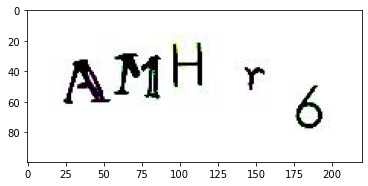

there was a problem reading the captcha correctly!
AMHr6

Status message
Your comment has been queued for review by site administrators and will be published after approval.


In [26]:
%matplotlib inline
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import subprocess
import requests
from PIL import Image
from PIL import ImageOps

def cleanimage(imagepath):
    image=Image.open(imagepath)
    image=image.point(lambda x:0 if x<143 else 255)
    borderImage=ImageOps.expand(image,border=20,fill='white')
    borderImage.save(imagepath)
    
html=urlopen('http://www.pythonscraping.com/humans-only')
bsObj=BeautifulSoup(html)

imageLoction=bsObj.find('img',{'title':'Image CAPTCHA'})['src']
formBuildId=bsObj.find('input',{'name':'form_build_id'})['value']
captchaSid=bsObj.find('input',{'name':'captcha_sid'})['value']
captchaToken=bsObj.find('input',{'name':'captcha_token'})['value']

captchaUrl='http://pythonscraping.com'+imageLoction
urlretrieve(captchaUrl,'captcha.jpg')
cleanimage('captcha.jpg')
p=subprocess.Popen(['tesseract','captcha.jpg','captcha'],stdout=subprocess.PIPE,stderr=subprocess.PIPE)
p.wait()
f=open('captcha.txt','r')
captchaResponse=f.read().replace(' ','').replace('\n','')
print('captcha solution attempt:'+captchaResponse)

if len(captchaResponse)==5:
    params={'captcha_token':captchaToken,'captcha_sid':captchaSid,'form_id':'comment_node_page_form','form_build_id':formBuildId,
           'captcha_response':captchaResponse,'name':'wones','subject':'i come to seek the grail',
           'comment_body[und][0][value]':'...and i am not a bot'}
    r=requests.post('http://www.pythonscraping.com/comment/reply/10',data=params)
    responseObj=BeautifulSoup(r.text)
    if responseObj.find('div',{'class':'messages'}) is not None:
        print(responseObj.find('div',{'class':'messages'}).get_text())
else:
    
    pil_im = Image.open('captcha.jpg')
    plt.figure()
    plt.imshow(pil_im)
    plt.show()
    
    print('there was a problem reading the captcha correctly!')
    captchaResponse=input()
    params={'captcha_token':captchaToken,'captcha_sid':captchaSid,'form_id':'comment_node_page_form','form_build_id':formBuildId,
           'captcha_response':captchaResponse,'name':'wones','subject':'i come to seek the grail',
           'comment_body[und][0][value]':'...and i am not a bot'}
    r=requests.post('http://www.pythonscraping.com/comment/reply/10',data=params)
    responseObj=BeautifulSoup(r.text)
    if responseObj.find('div',{'class':'messages'}) is not None:
        print(responseObj.find('div',{'class':'messages'}).get_text())

### 12避开采集陷阱

In [13]:
import requests
from bs4 import BeautifulSoup
session=requests.Session()
headers={'User-Agent':'Mozilla/5.0(Macintosh;Intel Mac OS X 10_9_5 )AppleWebKit 537.36 (KHTML,like Gecko)Chrome',
        'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}
url='https://www.whatismybrowser.com/'
req=session.get(url,headers=headers)
bsObj=BeautifulSoup(req.text)
print(bsObj.find('a',{'class':'useragent terminal terminal-block'}).text)ee

Mozilla/5.0(Macintosh;Intel Mac OS X 10_9_5 )AppleWebKit 537.36 (KHTML,like Gecko)Chrome


### 13用爬虫测试网站

In [5]:
import unittest
class TestAddition(unittest.TestCase):
    def setUp(self):
        print('setting up the test')
    def tearDown(self):
        print('tearing down the test')
    def test_twoPlusTwo(self):
        total=2+2
        self.assertEqual(4,total)
        
if __name__=='__main__':
    unittest.main()

E
ERROR: C:\Users\王生辉\AppData\Roaming\jupyter\runtime\kernel-1dc8c43d-7dc4-4e32-ac4a-884af022e3a4 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\王生辉\AppData\Roaming\jupyter\runtime\kernel-1dc8c43d-7dc4-4e32-ac4a-884af022e3a4'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

e:\python3.9\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
from selenium import webdriver
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
driver=webdriver.PhantomJS()
driver.get('http://www.pythonscraping.com/pages/files/form.html')

firstnameFiled=driver.find_element_by_name('firstname')
lastnameFiled=driver.find_element_by_name('lastname')
submitButton=driver.find_element_by_id('submit')
###方法1###
# firstnameFiled.send_keys('www')
# lastnameFiled.send_keys('com')
# submitButton.click()
###方法2###
actions=ActionChains(driver).click(firstnameFiled).send_keys('www').click(lastnameFiled).send_keys('com').send_keys(Keys.RETURN)
actions.perform()
##############
print(driver.find_element_by_tag_name('body').text)
driver.close()

Hello there, www com!


In [ ]:
from selenium import webdriver
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
driver=webdriver.PhantomJS()
driver.get('http://www.pythonscraping.com/pages/javascript/draggableDemo.html')
print(driver.find_element_by_id('message').text)
element=driver.find_element_by_id('draggable')
target=driver.find_element_by_id('div2')
actions=ActionChains(driver)
actions.drag_and_drop(element,target).perform()
print(driver.find_element_by_id('message').text)

e:\python3.9\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [4]:
from selenium import webdriver
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
driver=webdriver.PhantomJS()
driver.get('http://www.pythonscraping.com')
driver.get_screenshot_as_file('tmp.jpg')

e:\python3.9\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '
e:\python3.9\lib\site-packages\selenium\webdriver\remote\webdriver.py:1030: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn("name used for saved screenshot does not match file "


True

### 14远程采集